# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

In [4]:
# "IPython magic command" to automatically reload any module whose
# implementation has been modified during the execution of the notebook
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

### Exercise 1
This exercise simulate the Ehrenfest model.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

### 1.
It's a Markov chain because it's a process whose state k depends only on the previous state. The chain is said to be memoryless.

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

### 2.
The chain is irreducible: there is no absorbing state, so any pair of points in the state space can be connected by a path. The chain is finite closed, so it is positively recurrent. It is periodic with period 2, since even and odd states form a partition of the state space.

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

### 3.
The transitionn matrix is stochastic. It composed by the diagonal up to the main diagonal and by the diagonal under the main diagonal.

In [5]:
# The number of particules give the number of states
K = 30

P = np.diag((np.arange(K)+1)/K, k = -1) + np.diag(1-((np.arange(K))/K), k = 1)

print(P)

[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.03333333 0.         0.96666667 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.06666667 0.         0.93333333 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.1        0.         0.9        0

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

### 4.

In [6]:
# Generation of the invariant probability
pi = binom.pmf(np.arange(K+1), K, 1/2)

# We verify the equality between the array 
np.allclose(pi, pi@P)


True

np.allclose return true so $\pi$ = $\pi$P and $\pi$ corespond to the invariant probability

5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$. Random number generation will be controlled by a [random number generator](https://numpy.org/doc/stable/reference/random/generator.html) passed as an input to the function.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


In [7]:
def ehrenfest(K, mu, nmax, rng):
    """
    Simulates an Ehrenfest urn model.

    The Ehrenfest urn model represents a system of K particles in two urns.
    At each time step, a particle is chosen uniformly at random and moved 
    from its current urn to the other.

    Args:
        K (int): Total number of particles in the system.
        mu (numpy.ndarray): Initial distribution of particles in the urns.
        nmax (int): Maximum number of time steps to simulate.
        rng (numpy.random.RandomState): Random number generator.

    Returns:
        numpy.ndarray: Array representing the number of particles in the first urn
                       at each time step.
    """
    Xi = np.argmax(mu)
    X = np.zeros((nmax + 1, 1))
    X[0] = Xi

    for i in range(nmax):
        p = Xi / K

        # Generate a binary outcome based on the probability p
        if rng.rand() > p:
            Xi += 1
        else:
            Xi -= 1
        X[i + 1] = Xi

    return X


6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

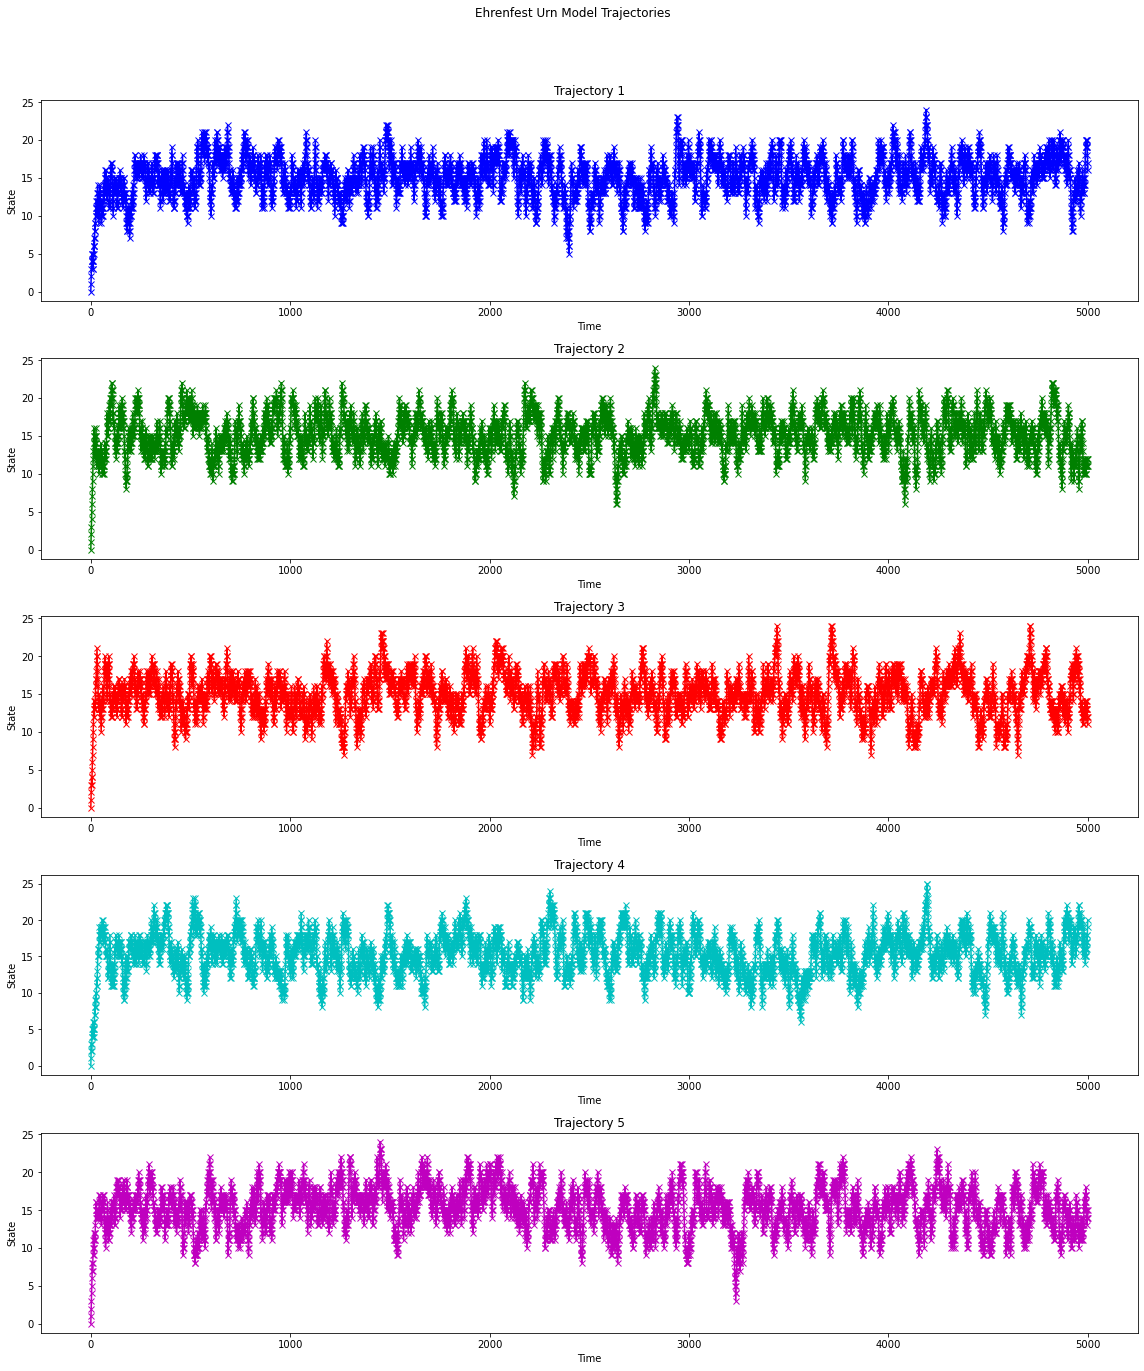

In [8]:
#Set the seed
seed_value = 31 

#Initialize random generator
rng = np.random.RandomState(seed_value)

#Define parameter

#
nmax = 5000

K = 30

mu = np.zeros((31, 1))
mu[0] = 1


# Create a figure with subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 20))  # 5 rows, 1 column of subplots

# Create a list of colors for the subplots
colors = ['b', 'g', 'r', 'c', 'm']

for x in range(5):
    X = ehrenfest(K,mu, nmax, rng)
    
    # Plot the current state in the corresponding subplot
    axs[x].plot(X, marker='x', linestyle='-', color=colors[x])
    axs[x].set_xlabel("Time")
    axs[x].set_ylabel("State")
    # Add a title to each subplot
    axs[x].set_title(f"Trajectory {x+1}")

# Add a common title for all subplots
fig.suptitle("Ehrenfest Urn Model Trajectories")

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Show the plot
plt.show()

We can see that the chain stay between the states 10 and 20. It's logical since the transtion probabilities are higher for the middle states than for the end-of-chain states.


7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

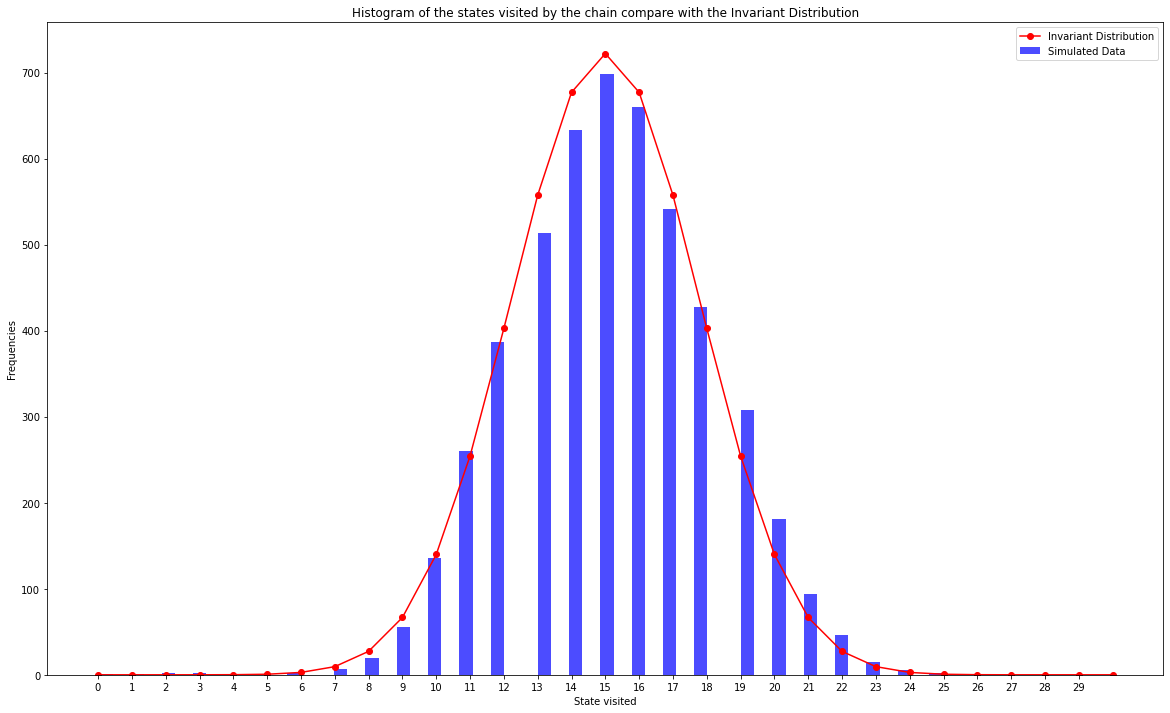

In [38]:
#
nmax = 5000
K = 30
mu = np.zeros((31, 1))
mu[0] = 1
X = ehrenfest(K,mu, nmax, rng)

# Set the figure size
plt.figure(figsize=(20, 12))

# Plot the histogram
plt.hist(X.flatten(), bins='auto', color='blue', alpha=0.7, rwidth=0.85, label='Simulated Data')

# Plot the invariant distribution
plt.plot(np.arange(len(pi)), pi*5000, color='red', marker='o', label='Invariant Distribution')


# Set custom x-axis labels 
plt.xticks(range(30), range(30))


# Add labels and a title
plt.xlabel('State visited')
plt.ylabel('Frequencies')
plt.title('Histogram of the states visited by the chain compare with the Invariant Distribution')

# Show the legend
plt.legend()

# Show the plot
plt.show()

The probability distribution fit the empirical histogram of the trajectory. So for a long enough trajectory, the empirical histogram tends towards the invariant probability 

8\. a) Modify the function defined in 5. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [9]:
def ehrenfest_stop(K, nmax, rng):
    """
    Simulates an Ehrenfest urn model and returns the return time to state 0.

    The Ehrenfest urn model represents a system of K particles in two urns.
    At each time step, a particle is chosen uniformly at random and moved 
    from its current urn to the other.

    Args:
        K (int): Total number of particles in the system.
        nmax (int): Maximum number of time steps to simulate.
        rng (numpy.random.RandomState): Random number generator.

    Returns:
        Tuple[int, numpy.ndarray]: Return time to state 0 (T_{0,0}) and 
                                   array representing the number of particles 
                                   in the first urn at each time step.
    """
    Xi = 1
    X = np.zeros((nmax, 1))
    
    premier_retour = None
    for  k in range(nmax-1):
        p = Xi / K

        # Generate a binary outcome based on the probability p
        if rng.rand() > p:
            Xi += 1
        else:
            Xi -= 1
            
        if Xi == 0 and premier_retour == None:
            premier_retour = k
        X[k + 1, 0] = Xi
        

    return premier_retour, X


8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

In average for the 5 trajectories draw in our simulations, the return time to 0 is : 1765


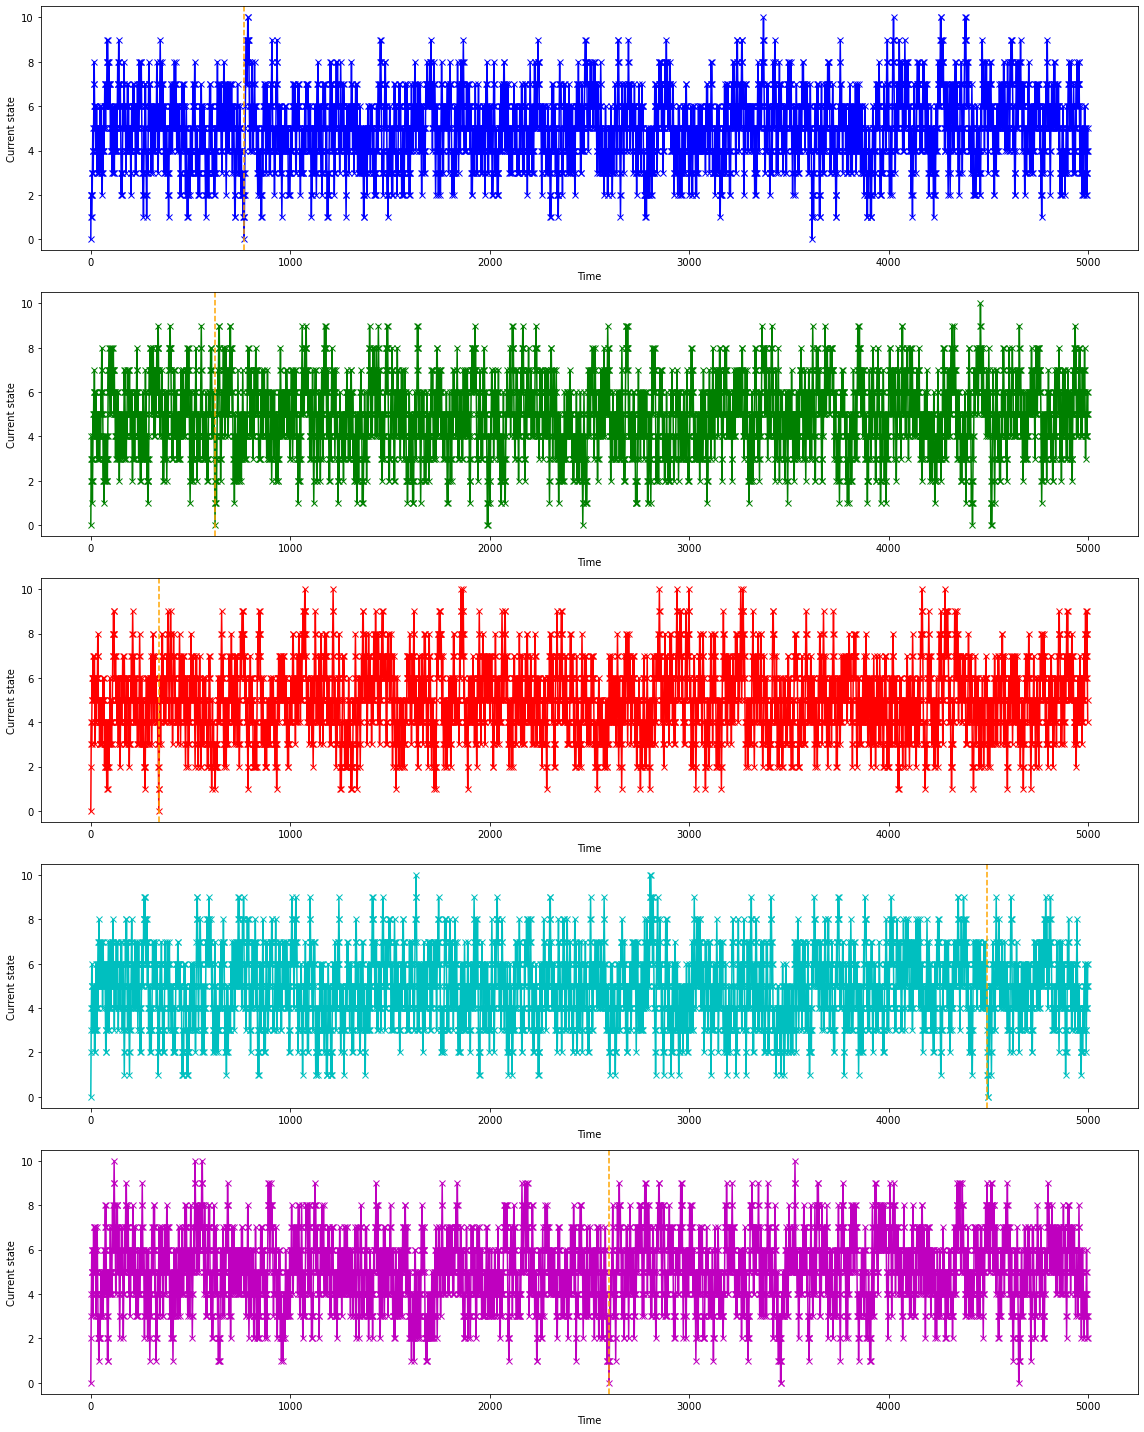

In [16]:
# Set the chain parameters 
nmax = 5000

K = 10

# Create a figure with subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 20))  # 5 rows, 1 column of subplots

# Create a list of colors for the subplots
colors = ['b', 'g', 'r', 'c', 'm']

# Initialization of the return time to zero
return_time_0_mean = 0


for trajectory in range(5):
    return_time_0, X = ehrenfest_stop(K, nmax, rng)

    
    # Plot the current state in the corresponding subplot
    axs[trajectory].plot(X, marker='x', linestyle='-', color=colors[trajectory])
    # Add a vertical line at the return time to state 0
    axs[trajectory].axvline(x=return_time_0, color='orange', linestyle='--', label='Return Time to State 0')
    axs[trajectory].set_xlabel("Time")
    axs[trajectory].set_ylabel("Current state")
    return_time_0_mean += return_time_0 
    
    
# Calculate the average of the 5 trajectories    
return_time_0_mean = return_time_0_mean/5

print(f'In average for the 5 trajectories draw in our simulations, the return time to 0 is : {round(return_time_0_mean)}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

### 8.c
The probability to reach extreme like 0 and K decrease as we are closer to reach them, proportionnaly to K. If K increases it would be rarer to reach the 0 zero, so the return time mean 0 should increase.

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu \in \mathbb{R}^K$ and transition matrix $P \in \mathbb{R}^{K \times K}$, with $K = 3$:

$$
  \mu = [0, 1, 0], 
  %
  \quad
  %
  P = \begin{pmatrix}
   0.2 & 0.7 & 0.1 \\
   0.9 & 0 & 0.1 \\
   0.2 & 0.8 & 0 
  \end{pmatrix}.
$$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

### 1.
X is irreductible there is always a non null probability to go from one state to another and so it's also reccurent. And since it's finite space, it's positve reccurent. X is aperiodic since the probality to stay in the state zero is non null. 

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$, [random number generator](https://numpy.org/doc/stable/reference/random/generator.html);
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

In [17]:
def simulate_dthmc(P, mu,nmax, rng):
    """
    Simulates a discrete-time homogeneous Markov chain.

    Args:
        P (numpy.ndarray): Transition matrix of the Markov chain.
        mu (numpy.ndarray): Initial state distribution.
        nmax (int): Maximum number of iterations.
        rng (numpy.random.RandomState): Random number generator.

    Returns:
        numpy.ndarray: Array of simulated states.
    """
    
    
    
    N = mu.shape[0]
    states = np.arange(N)
    # Initialization of the array containing the results
    X = np.zeros((nmax,1))
    
    #Initialize the trajectory
    X[0] = np.argmax(mu)
    
    # loop for q = 0 to nmax-1
    for q in range(nmax-1):

        X[q+1] = rng.choice(states, p=P[int(X[q, 0]), :].squeeze())
        
    return X

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

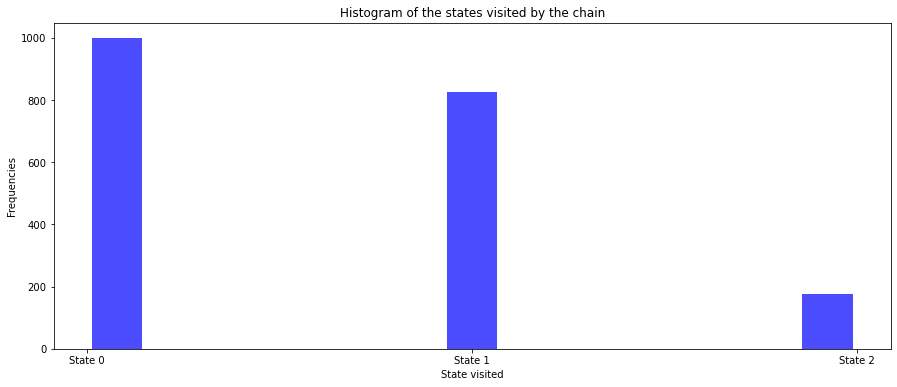

In [26]:
#Set the seed
seed_value = 31 

#Initialize random generator
rng = np.random.RandomState(seed_value)

#Define parameter
nmax = 2000


# Generate n random number
plt.figure(figsize=(15, 6))

transition_matrix = np.array([
    [0.2, 0.7, 0.1],  # Transition probabilities from state 1
    [0.9, 0, 0.1],  # Transition probabilities from state 2
    [0.2, 0.8, 0]])   # Transition probabilities from state 3

mu = np.array([0, 1, 0])

X = simulate_dthmc(transition_matrix, mu,nmax, rng)
    
plt.hist(X.flatten(), bins='auto', color='blue', alpha=0.7, rwidth=0.85)



# Set custom x-axis labels
plt.xticks(range(3), ["State 0", "State 1", "State 2"])

# Ajouter des labels et un titre si nécessaire
plt.xlabel('State visited')
plt.ylabel('Frequencies')
plt.title('Histogram of the states visited by the chain')
    



# Show the plot
plt.show()

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

In [25]:
# Find the eigenvector corresponding to the eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix.T)
index_one = np.where(np.isclose(eigenvalues, 1))[0][0]
invariant_distribution = np.real(eigenvectors[:, index_one])
invariant_distribution /= np.sum(invariant_distribution)  # Normalize to make it a probability distribution

print("Invariant distribution pi is :", invariant_distribution)

Invariant distribution pi is : [0.49197861 0.4171123  0.09090909]


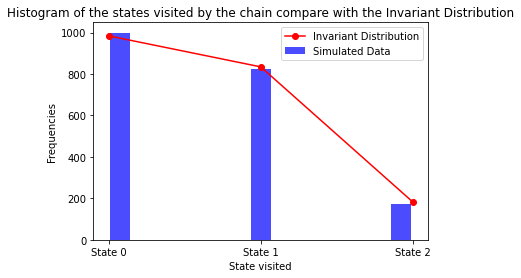

In [27]:
# Plot the histogram
plt.hist(X.flatten(), bins='auto', color='blue', alpha=0.7, rwidth=0.85, label='Simulated Data')

# Plot the invariant distribution
plt.plot(np.arange(len(invariant_distribution)), invariant_distribution*2000, color='red', marker='o', label='Invariant Distribution')

# Set custom x-axis labels
plt.xticks(range(3), ["State 0", "State 1", "State 2"])

# Add labels and a title
plt.xlabel('State visited')
plt.ylabel('Frequencies')
plt.title('Histogram of the states visited by the chain compare with the Invariant Distribution')

# Show the legend
plt.legend()

# Show the plot
plt.show()

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


In [28]:
nmax = 20
mu = np.array([[0, 1, 0]])
P = transition_matrix
mu_n = np.zeros((nmax, 3))
mu_n[0] = mu
# Iterative computation to store successive mu values

for n in range(nmax-1):
    mu_n[n+1] = mu_n[n]@P
    
    




In [29]:
print(f"when n increase mu_n goes to the distribution : {mu_n[-1]}")

when n increase mu_n goes to the distribution : [0.49266031 0.4164306  0.09090909]


5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 0, \dotsc , K-1$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?

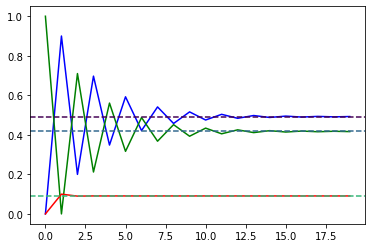

In [92]:
# We decresse nmax to better understand the convergence
nmax=20
n_list = np.arange(nmax)
colors = ['b', 'g', 'r']
# Plot the curves 
for i in range(states_number):
    plt.plot(n_list, mu_n[:, i], color = colors[i])
# Plot the theorical values for PI the invariant distribution
for i, component in enumerate(invariant_distribution):
    plt.axhline(y=component, linestyle='--', color=plt.cm.viridis(i / len(invariant_distribution)), label=f'Component {i+1}')


plt.show()

These curves show the fast converge of the probability distribution to the invariant distribution

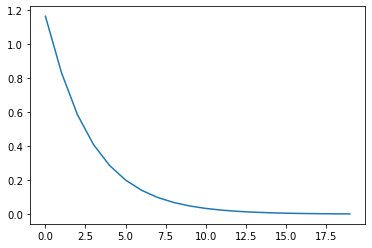

In [101]:
# Compute the norm between the probability distribution of  𝑋(𝑛) and PI the invariant distribution
norm = np.linalg.norm(mu_n- invariant_distribution,ord=1, axis=1)

plt.plot(n_list, norm)
    
plt.show()

We can observe that the converge is exponantial

6\. For each state $i \in \{0, \dotsc, K-1 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 

We just modified the function simulate_dthmc to retrieve the return time to i.

In [30]:
def simulate_dthmc_stop(P, mu, nmax, rng):
    """
    Simulates a discrete-time homogeneous Markov chain with stopping condition.

    Args:
        P (numpy.ndarray): Transition matrix of the Markov chain.
        mu (numpy.ndarray): Initial state distribution.
        nmax (int): Maximum number of iterations.
        rng (numpy.random.RandomState): Random number generator.

    Returns:
        Tuple[int, numpy.ndarray]: Return time to the initial state and
                                   array representing the simulated states.
    """
    N = mu.shape[0]
    states = np.arange(N)
    X = np.zeros((nmax, 1))

    # Check if the initial state distribution and transition matrix have the same length
    assert np.isclose(mu.shape[0], P.shape[1]), "mu the initial state and P don't have the same length"

    # Set the initial state to the state with the maximum probability in the initial distribution
    X[0] = np.argmax(mu)

    # Choose the next state based on the transition probabilities from the initial state
    X[1] = rng.choice(states, p=P[int(X[0, 0]), :].squeeze())
    n = 1

    # Loop until the chain returns to the initial state or reaches the maximum number of iterations
    while X[n] != X[0] and n < nmax - 1:
        X[n + 1] = rng.choice(states, p=P[int(X[n, 0]), :].squeeze())
        n += 1

    return n, X

In [31]:
# Number of trajectory
n_trajectory = 100
# Trick to initialize the first state of the chain 
mu = np.eye(3)
# Initialize the arrray containing the return to the first state
return_time = np.zeros((n_trajectory,3))

for initial_state in range(3):
    #Draw 100 trajectories
    for trajectory in range(n_trajectory):
        # Store the return time to the first state
        return_time[trajectory, initial_state], X = simulate_dthmc_stop(P, mu[initial_state],nmax, rng)

# Compute the empirical average return time to the first state.
empirical_average_rt = np.sum(return_time, axis=0)/n_trajectory
print(f"empirical average return time for n = {n_trajectory} trajectories: {np.round(empirical_average_rt,2)}")

# Compute the theorical average return time to the first state
# Using the ergodic theorem
theorical_average_rt = 1/invariant_distribution
print(f"theorical average return time for n = {n_trajectory} trajectories: {np.round(theorical_average_rt, 2)}")

empirical average return time for n = 100 trajectories: [2.11 2.35 8.9 ]
theorical average return time for n = 100 trajectories: [ 2.03  2.4  11.  ]


We can observe that the empirical average return time is close to the theorical but the convergence is slower for the state 3. Let's compare if we compute 1000 trajectories.

In [130]:
n_trajectory = 1000
mu = np.eye(3)
return_time = np.zeros((n_trajectory,3))

for initial_state in range(3):
    
    for trajectory in range(n_trajectory):
        
        return_time[trajectory, initial_state], X = simulate_dthmc_stop(P, mu[initial_state],nmax, rng)
        
empirical_average_rt = np.sum(return_time, axis=0)/n_trajectory
print(f"empirical average return time for n = {n_trajectory} trajectories: {np.round(empirical_average_rt,2)}")

theorical_average_rt = 1/invariant_distribution
print(f"theorical average return time for n = {n_trajectory} trajectories: {np.round(theorical_average_rt, 2)}")

empirical average return time for n = 1000 trajectories: [2.05 2.43 9.79]
theorical average return time for n = 1000 trajectories: [ 2.03  2.4  11.  ]


We see that the state 3 didn't converge perfectly, it should be better for more trajectories.